In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Равновесие жидкость−пар. Построение фазовой диаграммы двухкомпонентной системы и определение коэффициентов активности по давлению пара компонентов.

| Параметр                | **Бензол**     | **Изопропанол**     |
|------------------------|------------------|--------------|
| Молярная масса ($g/mol$)        | $ M_1 = 78.11 $        | $M_2 = 60.10$    |
| Плотность ($g/cm^{3}$)          | $ d_1 = 0.879 $     | $d_2 = 0.785$        |

Общий объём смеси: **10 мл**  
Атмосферное давление: **746 мм рт. ст.**

In [37]:
# Constants value
pressure = 0.994585 # бар
M1 = 78.11
M2 = 60.1
d1 = 0.879
d2 = 0.785

### Поскольку при построении фазовых диаграмм по оси абсцисс откладывают состав в мольных долях, проведите пересчёт от объёмных долей к мольным по формуле:

Формула для пересчёта объёмной доли в мольную:

$$
x = \frac{1}{\frac{M_1}{M_2} \cdot \frac{d_2}{d_1} \cdot \frac{1}{\varphi_1} + \left(1 - \frac{M_1}{M_2} \cdot \frac{d_2}{d_1}\right)}
$$

где:
- $ x $ — мольная доля компонента,
- $ M_1, M_2 $ — молярные массы компонентов 1 и 2,
- $ d_1, d_2 $ — плотности чистых компонентов при температуре опыта,
- $ \varphi_1 $ — объёмная доля компонента 1.

In [12]:
data = pd.read_csv('3.csv', index_col='№').drop(columns=['T1 (K)', 'T2 (K)'])

phi2 = data['f2'] / 100.0

phi2 = np.clip(phi2, 1e-8, 1)

k = (M2 * d1) / (M1 * d2)
data['x2'] = 1.0 / ((1.0 + k / phi2)- k)

# Мольная доля второго компонента
data.loc[1, 'x2'] = 0

data.style.format('{:.2f}')
# K
data['T (K)'] = data['T (K)'] + 273.15

data

,f2,T (K),n init.,n cond.,x2
№,,,,,
1,0,348.836364,1.5010,1.4980,0.000000
2,10,348.330000,1.4890,1.4620,0.114233
3,20,348.350000,1.4720,1.4585,0.224909
4,30,348.593750,1.4590,1.4535,0.332191
5,40,348.978571,1.4455,1.4510,0.436235
6,50,349.616667,1.4375,1.4460,0.537183
7,60,350.510000,1.4180,1.4430,0.635173
8,70,351.537500,1.4115,1.4365,0.730331
9,80,352.766667,1.3995,1.4270,0.822781


### Построение калибровочной зависимости


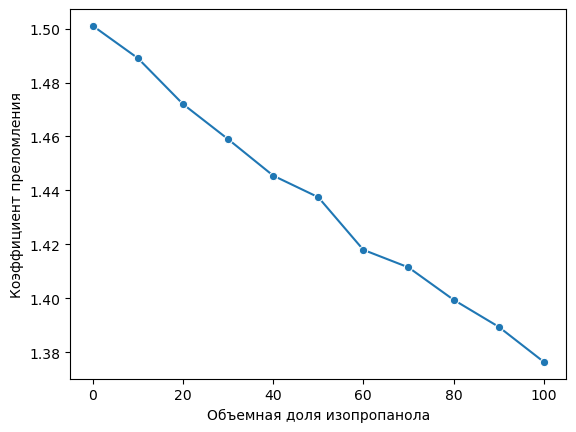

In [13]:
ax = sns.lineplot(data=data, x='f2', y='n init.', marker='o')
ax.set_xlabel('Объемная доля изопропанола')
ax.set_ylabel('Коэффициент преломления')

plt.show()

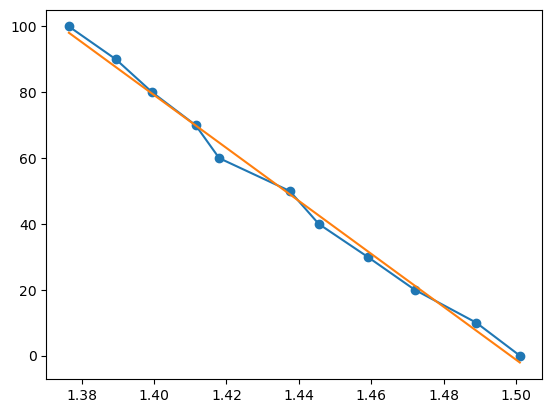

In [14]:
y = data['f2'].values.reshape(-1, 1)
x = data['n init.'].values.reshape(-1, 1)

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

w = model.coef_
b = model.intercept_

plt.plot(x, y, marker='o')
plt.plot(x, w*x + b)

In [15]:
y_pred = model.predict(x)

print(r2_score(y, y_pred))

0.9951051441750692


### Определение $\phi$ по калибровочной зависимости

$\phi$ = f cond.

In [16]:
data['f cond.'] = model.predict(data['n cond.'].values.reshape(-1, 1))
data.iloc[0, -1] = 0
data.iloc[-1, -1] = 100
data

,f2,T (K),n init.,n cond.,x2,f cond.
№,,,,,,
1,0,348.836364,1.5010,1.4980,0.000000,0.000000
2,10,348.330000,1.4890,1.4620,0.114233,29.300643
3,20,348.350000,1.4720,1.4585,0.224909,32.116633
4,30,348.593750,1.4590,1.4535,0.332191,36.139476
5,40,348.978571,1.4455,1.4510,0.436235,38.150898
6,50,349.616667,1.4375,1.4460,0.537183,42.173741
7,60,350.510000,1.4180,1.4430,0.635173,44.587447
8,70,351.537500,1.4115,1.4365,0.730331,49.817143
9,80,352.766667,1.3995,1.4270,0.822781,57.460546


In [17]:
phi_cond = data['f cond.']/100
data['x cond.'] = 1.0 / ((1.0 + k / phi_cond)- k)
data

,f2,T (K),n init.,n cond.,x2,f cond.,x cond.
№,,,,,,,
1,0,348.836364,1.5010,1.4980,0.000000,0.000000,0.000000
2,10,348.330000,1.4890,1.4620,0.114233,29.300643,0.324795
3,20,348.350000,1.4720,1.4585,0.224909,32.116633,0.354479
4,30,348.593750,1.4590,1.4535,0.332191,36.139476,0.396443
5,40,348.978571,1.4455,1.4510,0.436235,38.150898,0.417233
6,50,349.616667,1.4375,1.4460,0.537183,42.173741,0.458437
7,60,350.510000,1.4180,1.4430,0.635173,44.587447,0.482920
8,70,351.537500,1.4115,1.4365,0.730331,49.817143,0.535364
9,80,352.766667,1.3995,1.4270,0.822781,57.460546,0.610562


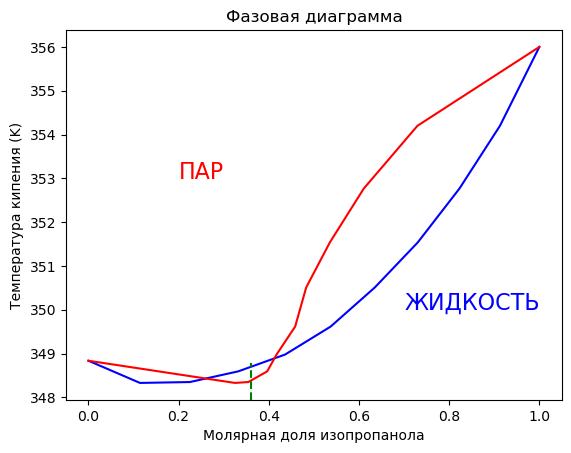

In [23]:
y = data['T (K)']

plt.plot(data['x2'], y, color='blue')
plt.plot(data['x cond.'], y, color='red')
plt.xlabel('Молярная доля изопропанола')
plt.ylabel('Температура кипения (K)')
plt.title('Фазовая диаграмма')
plt.axvline(0.36, ymin=0, ymax=0.1, linestyle='--', color='green')
plt.text(0.2, 353, 'ПАР', color='red', fontsize=16)
plt.text(0.7, 350, 'ЖИДКОСТЬ', color='blue', fontsize=16)

plt.show()

#### Точка азеотропа x2 = 0.36

### Расчет коэффициентов активности. 

Одним из способов определения коэффициентов активности является их расчёт по результатам измерений общего давления пара над смесью летучих веществ, если известен состав раствора и газовой фазы.

Для двухкомпонентного раствора, исходя из уравнений (2), получим:

$$
\gamma_1 = \frac{p_1}{p_1^* x_1} = \frac{p y_1}{p_1^* x_1}, \quad
\gamma_2 = \frac{p_2}{p_2^* x_2} = \frac{p y_2}{p_2^* x_2} \tag{3}
$$

где:
- $ \gamma_1, \gamma_2 $ — коэффициенты активности компонентов,
- $ p_1, p_2 $ — парциальные давления компонентов,
- $ p_1^*, p_2^* $ — давления насыщенного пара чистых компонентов при данной температуре,
- $ x_1, x_2 $ — мольные доли компонентов в жидкой фазе,
- $ y_1, y_2 $ — мольные доли компонентов в паровой фазе,
- $ p $ — общее давление пара над раствором.

Жидкость кипит, когда давление её насыщенного пара равно атмосферному, поэтому давление $ p $ можно определить по манометру:

$$
p = p_{\text{атм}}
$$

Давления насыщенных паров чистых компонентов при заданной температуре можно рассчитать по эмпирическому уравнению Антуана:

$$
\lg p^* = A - \frac{B}{T + C}
$$

где:
- $ A $, $ B $, $ C $ — эмпирические параметры вещества,
- $ T $ — температура (в °C или K — зависит от системы единиц параметров),
- $ p^* $ — давление насыщенного пара чистого компонента (обычно в мм рт. ст. или кПа).

#### Таблица 2.

In [35]:
# Antuan constants

b = (4.72583, 1660.652, -1.461)

i = (4.8610, 1357.427, -75.814)

In [32]:
def pression_calc(T, A, B, C):
    '''
     Расчет давления насыщенных паров чистых компонентов
     по уравнению Антуана.
    '''
    lg_p = A - B/(T+C)
    return np.exp(lg_p)

In [44]:
# x1, x2
x1 = 1 - data['x2']
data_2 = pd.DataFrame({'x1':x1})
data_2['x2'] = data['x2']
# y1, y2
data_2['y1'] = 1 - data['x cond.']
data_2['y2'] = data['f cond.']
# T
data_2['T (K)'] = data['T (K)']
# p1, p2
data_2['p1'] = data_2['T (K)'].apply(lambda x: pression_calc(x, *b))
data_2['p2'] = data_2['T (K)'].apply(lambda x: pression_calc(x, *i))
# gamma1, gamma2
data_2['gamma1'] = data_2['y1']*pressure/(data_2['x1']*data_2['p1'])
data_2['gamma2'] = data_2['y2']*pressure/(data_2['x2']*data_2['p2'])
data_2.fillna(0, inplace=True)


display(data_2)

,x1,x2,y1,y2,T (K),p1,p2,gamma1,gamma2
№,,,,,,,,,
1,1.000000,0.000000,1.000000,0.000000,348.836364,0.946732,0.895071,1.050546,0.000000
2,0.885767,0.114233,0.675205,29.300643,348.330000,0.940148,0.886840,0.806420,287.662861
3,0.775091,0.224909,0.645521,32.116633,348.350000,0.940407,0.887164,0.880812,160.089229
4,0.667809,0.332191,0.603557,36.139476,348.593750,0.943574,0.891121,0.952647,121.422378
5,0.563765,0.436235,0.582767,38.150898,348.978571,0.948586,0.897390,1.083831,96.927101
6,0.462817,0.537183,0.541563,42.173741,349.616667,0.956930,0.907843,1.216191,86.010396
7,0.364827,0.635173,0.517080,44.587447,350.510000,0.968684,0.922599,1.455225,75.674564
8,0.269669,0.730331,0.464636,49.817143,351.537500,0.982305,0.939746,1.744528,72.192205
9,0.177219,0.822781,0.389438,57.460546,352.766667,0.998745,0.960505,2.188340,72.314921


Text(0, 0.5, 'Коэффициент активности')

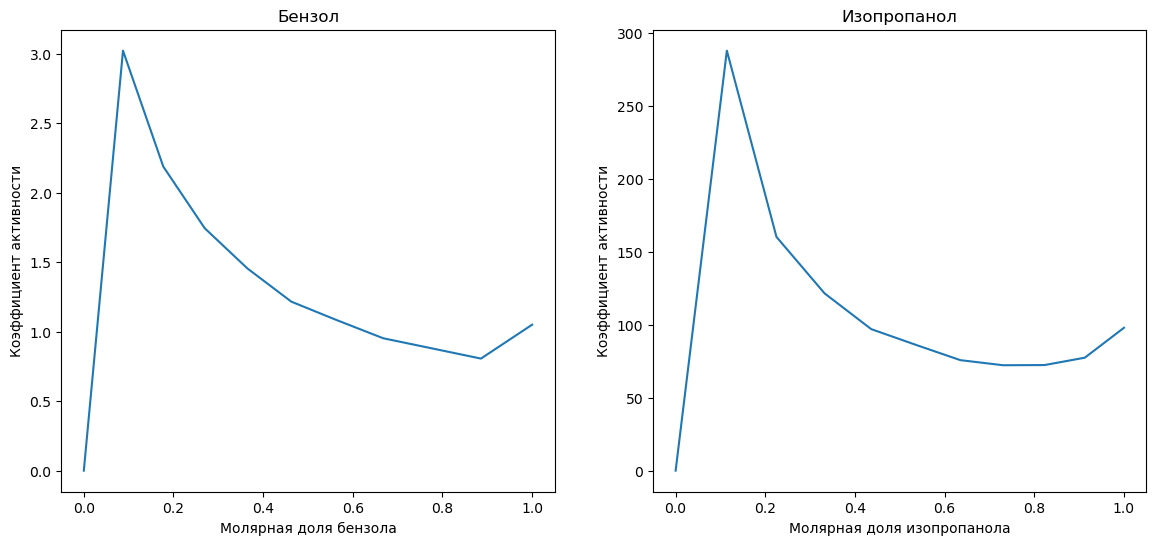

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(data_2['x1'], data_2['gamma1'])
ax[0].set_title('Бензол')
ax[0].set_ylabel('Коэффициент активности')
ax[0].set_xlabel('Молярная доля бензола')
ax[1].plot(data_2['x2'], data_2['gamma2'])
ax[1].set_title('Изопропанол')
ax[1].set_xlabel('Молярная доля изопропанола')
ax[1].set_ylabel('Коэффициент активности')